In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"D:\code\data\winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# 一个映射字典，用于将质量值从 0 到 5 进行映射
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}
# 你可以使用 pandas 的 map 函数以及任何字典，
# 来转换给定列中的值为字典中的值
df.loc[:, "quality"] = df.quality.map(quality_mapping)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,3
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,3
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,2


In [4]:
# 使用 frac=1 的 sample 方法来打乱 dataframe
# 由于打乱后索引会改变，所以我们重置索引
df = df.sample(frac=1).reset_index(drop=True)
# 选取前 1000 行作为训练数据
df_train = df.head(1000)
# 选取最后的 599 行作为测试/验证数据
df_test = df.tail(599)
len(df_train), len(df_test)

(1000, 599)

In [8]:
# 从 scikit-learn 导入需要的模块
from sklearn import tree
from sklearn import metrics

# 初始化一个决策树分类器，设置最大深度为 3
clf = tree.DecisionTreeClassifier(max_depth=7)
# 选择你想要训练模型的列
# 这些列作为模型的特征
cols = ['fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol']
# 使用之前映射的质量以及提供的特征来训练模型
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=7)

In [9]:
# 在训练集上生成预测
train_predictions = clf.predict(df_train[cols])
# 在测试集上生成预测
test_predictions = clf.predict(df_test[cols])
# 计算训练数据集上预测的准确度
train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
)
# 计算测试数据集上预测的准确度
test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
)
train_accuracy, test_accuracy

(0.767, 0.5776293823038398)

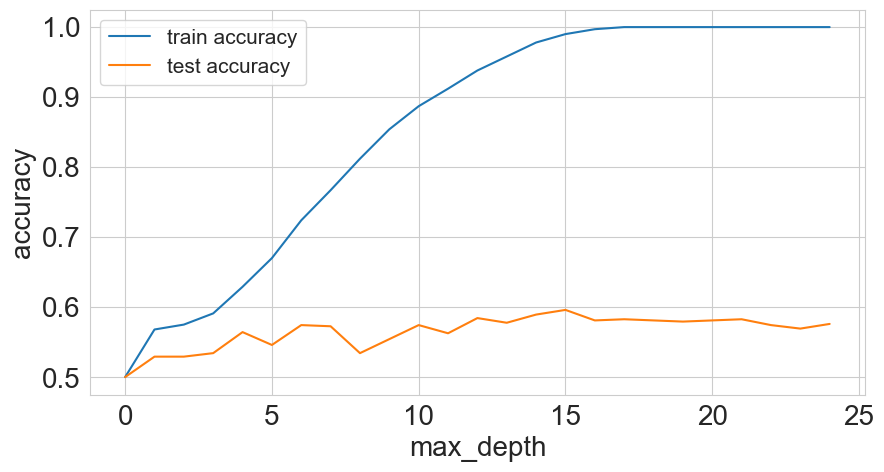

In [11]:
from sklearn import tree
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 设置全局标签文本的大小
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
# 确保图表直接在笔记本内显示
%matplotlib inline
# 初始化用于存储训练和测试准确度的列表
# 我们从 50% 的准确度开始
train_accuracies = [0.5]
test_accuracies = [0.5]
# 遍历几个不同的树深度值
for depth in range(1, 25):
    # 初始化模型
    clf = tree.DecisionTreeClassifier(max_depth=depth)

    # 选择用于训练的列/特征
    cols = [
        'fixed acidity', 'volatile acidity', 'citric acid',
        'residual sugar', 'chlorides', 'free sulfur dioxide',
        'total sulfur dioxide', 'density', 'pH',
        'sulphates', 'alcohol'
    ]
    #在给定特征上拟合模型
    clf.fit(df_train[cols], df_train.quality)
    # 创建训练和测试预测
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    # 计算训练和测试准确度
    train_accuracy = metrics.accuracy_score(
        df_train.quality, train_predictions
    )
    test_accuracy = metrics.accuracy_score(
        df_test.quality, test_predictions
    )
    #添加准确度到列表
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# 使用 matplotlib 和 seaborn 创建两个图
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()
